
#**Twitter US Airline Sentiment**


## **Context:**

Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

##**Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").



##**Dataset:**

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold
retweet_count
text
tweet_coord
tweet_created
tweet_location
user_timezone

##**Steps:**
- Import the necessary libraries
- Get the data
- Explore the data
- Do feature engineering (create relevant columns based on existing columns)
- Plot the wordcloud based on the relevant column
- Do pre-processing
- Noise removal (Special character, html tags, numbers,
stopword removal)
- Lowercasing
- Stemming / lemmatization
- Text to number: Vectorization
- CountVectorizer
- TfidfVectorizer
- Build Machine Learning Model for Text Classification.
- Optimize the parameter
- Plot the worldcloud based on the most important features
- Check the performance of the model
- Summary


In [ ]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from wordcloud import WordCloud

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#loading data from google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read the data
data=pd.read_csv('drive/MyDrive/Tweets.csv')

In [ ]:
data.shape                                               # print shape of data.

(14640, 15)

* 14640 rows and 15 columns in the data

In [ ]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


* Airline sentiment is the target variable here
* Sentiment and airline name has been derived form the text

In [ ]:
data.isnull().sum(axis=0)                                # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

## Exploratory data analysis

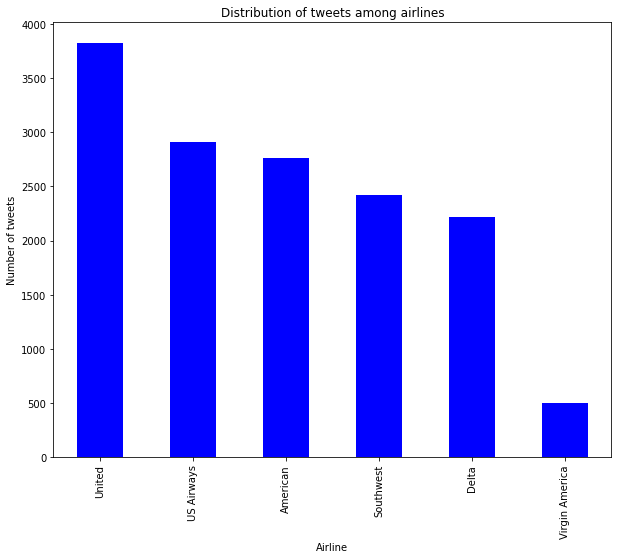

In [ ]:
# Plotting the distribution of all tweets among each airline
airline_counts = data['airline'].value_counts()
plt.figure(figsize = (10, 8))
airline_counts.plot(kind='bar', x='airline', y='counts', color='b', title='Distribution of tweets among airlines')
plt.xlabel('Airline')
plt.ylabel('Number of tweets')
plt.show()

* United airlines seem to have the highest number of tweets
* Followed by US Airways and American
* Virgin America seems to have the least number of Tweets

Total number of sentiments of tweets : green
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


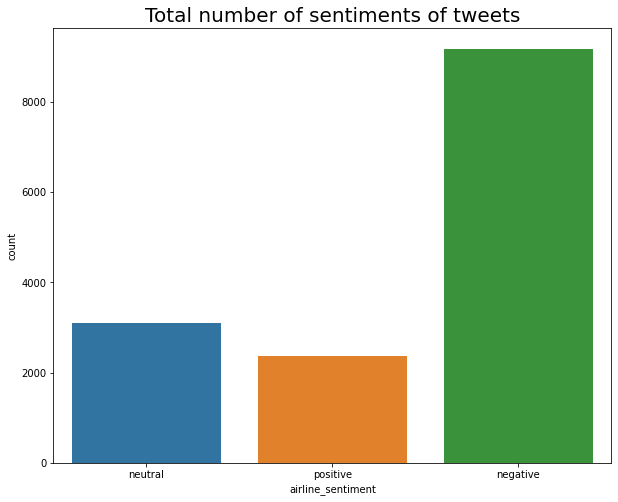

In [ ]:
# Plot the distribution of sentiment across all tweets
print("Total number of sentiments of tweets :",'green')
print(data.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = data)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

* Negative sentiment seems to be the highest among the tweet counts.
* Positive sentiment seems to be the lowest among the tweets.


<Figure size 1440x720 with 0 Axes>

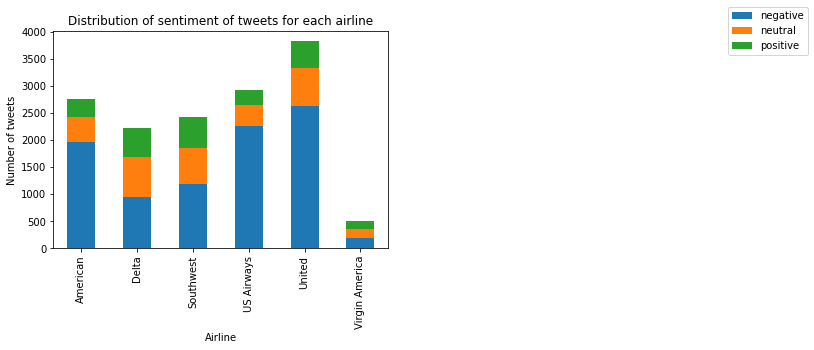

In [ ]:
# Plotting the distribution of sentiment of tweets for each airline
plt.figure(figsize = (20, 10))
sentiment_counts = data.groupby(['airline', 'airline_sentiment']).size().reset_index(name='counts')
sentiment_counts.pivot(index='airline', columns='airline_sentiment', values='counts').plot(kind='bar', stacked=True, title='Distribution of sentiment of tweets for each airline')
plt.xlabel('Airline')
plt.ylabel('Number of tweets')
plt.legend(loc='center left', bbox_to_anchor=(2.0, 1))
plt.show()

* United airlines has highest number of tweets and the negative sentiment is highest
* Next is US Airways with high negative tweets
* followed by American Airways also high negative tweets
* virgin america has the lowest number of tweets and at the same time the sentiment is equally distributed

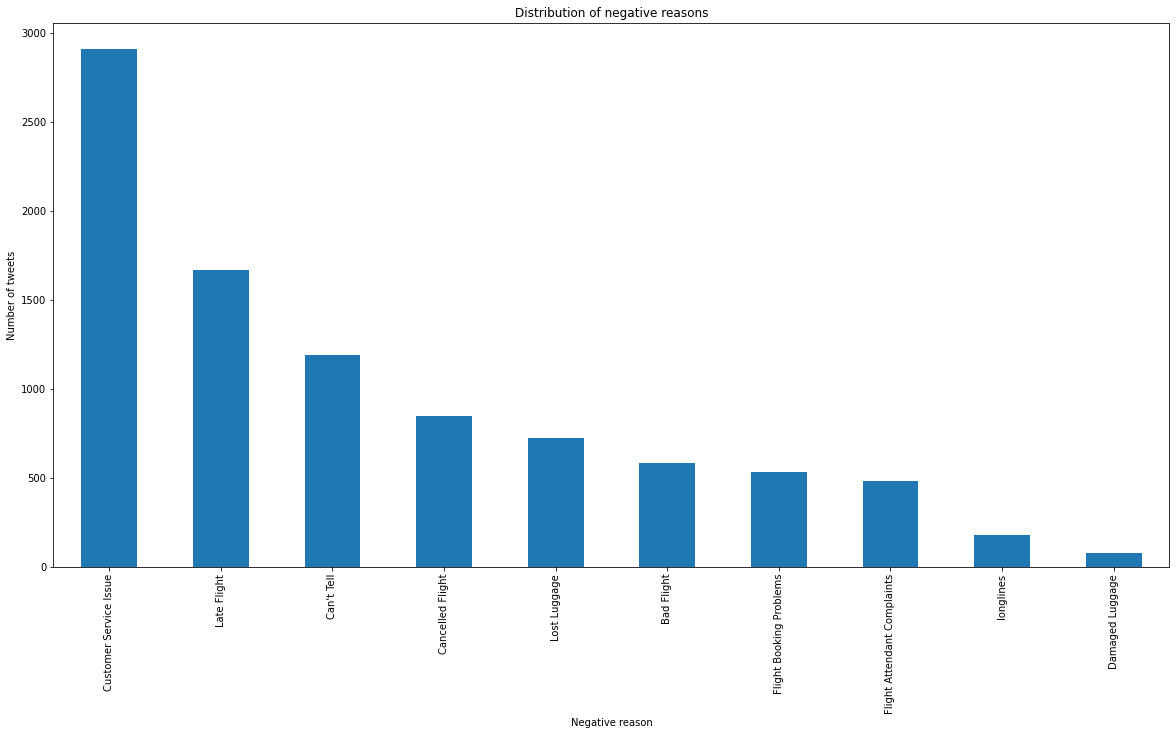

In [ ]:
# Plotting the distribution of all the negative reasons
plt.figure(figsize = (20, 10))
negative_reasons = data[data['airline_sentiment'] == 'negative']['negativereason'].value_counts()
negative_reasons.plot(kind='bar', title='Distribution of negative reasons')
plt.xlabel('Negative reason')
plt.ylabel('Number of tweets')
plt.show()

* The most frequent negative reason seem to be issue with customer service
* Next is late flights
* the least frequent seems to be Damaged luggage

In [ ]:
# Plotting the word cloud graph of tweets for positive sentiment
positive_tweets = data[data['airline_sentiment'] == 'positive']['text']
positive_text = ' '.join(positive_tweets)
positive_wordcloud = WordCloud(width=800, height=800, min_font_size=10).generate(positive_text)


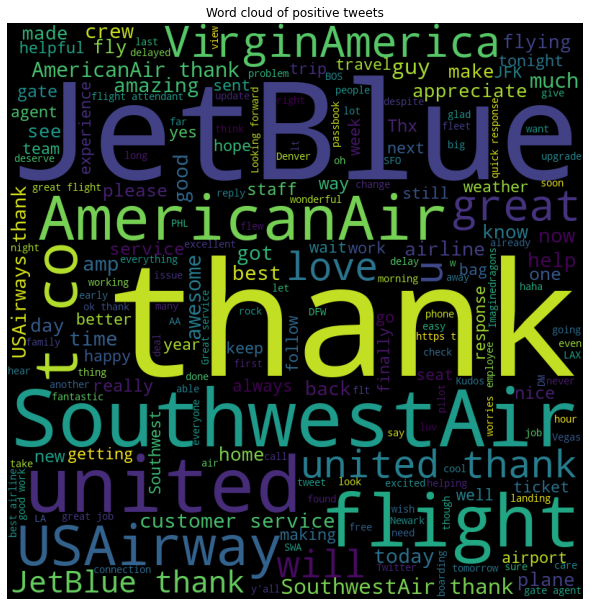

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word cloud of positive tweets")
plt.show()

* The meaningful words that can be spotted in the positive sentiments’ word cloud directly are Thank and  Jet Blue.

In [ ]:
# Plotting the word cloud graph of tweets for negative sentiment
negative_tweets = data[data['airline_sentiment'] == 'negative']['text']
negative_text = ' '.join(negative_tweets)
negative_wordcloud = WordCloud(width=800, height=800, min_font_size=10).generate(negative_text)

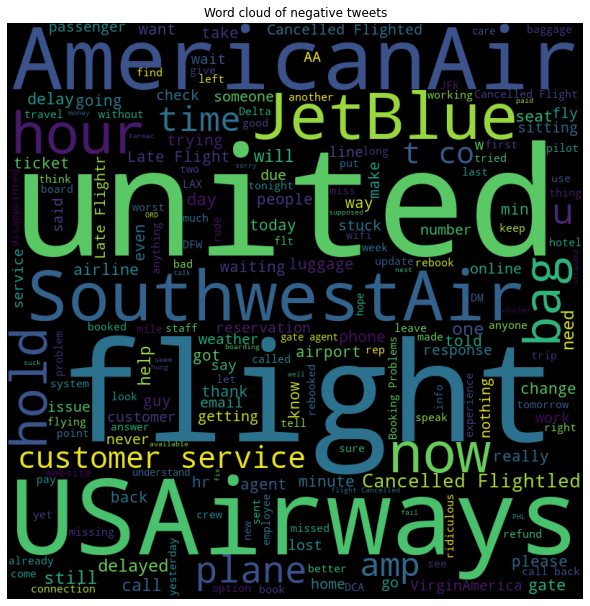

In [ ]:
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word cloud of negative tweets")
plt.show()

* The meaningful words that can be spotted in the negative sentiments’ word cloud directly are United  and  American Air.

In [ ]:
# Plotting the word cloud graph of tweets for negative sentiment
negative_reason = data[data['airline_sentiment'] == 'negative']['negativereason']
negative_reason_text = ' '.join(negative_reason)
negative_reason_wordcloud = WordCloud(width=800, height=800, min_font_size=10).generate(negative_reason_text)

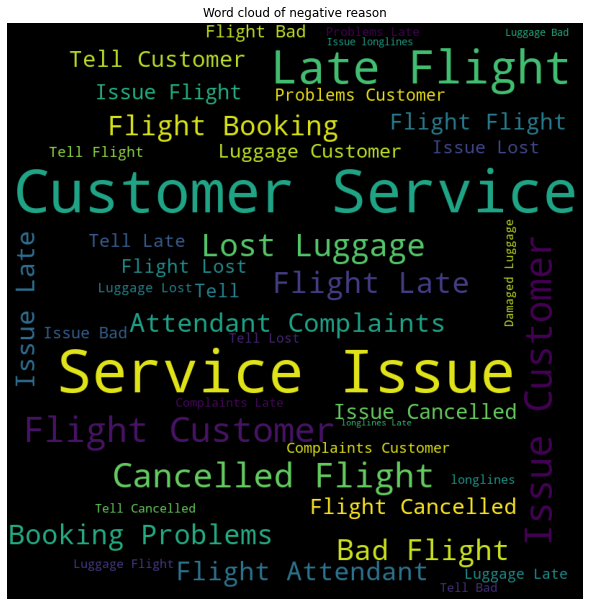

In [ ]:
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(negative_reason_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word cloud of negative reason")
plt.show()

* The meaningful words that can be spotted in the negative reason word cloud directly are "Service Issue, Customer Service, Late Flight.

## Understanding of Data Columns

In [ ]:
# Dropping all other columns except “text” and “airline_sentiment”.
df = data[['text', 'airline_sentiment']]


In [ ]:
# printing first 5 rows of data
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
# Shape of the new data set
df.shape

(14640, 2)

# Data Pre - Processing

### Text pre-processing: Data preparation.

In [ ]:
# Html tag removal
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df['text'] = df['text'].apply(lambda x: strip_html(x))
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: strip_html(x))

df.head()

<ipython-input-194-c846fee4cca1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: strip_html(x))
<ipython-input-194-c846fee4cca1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: strip_html(x))


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
#Remove the numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: remove_numbers(x))

df.head()

<ipython-input-195-4ffe39bafb62>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: remove_numbers(x))
<ipython-input-195-4ffe39bafb62>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: remove_numbers(x))


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
#Tokenization
def tokenize_text(text):
    return word_tokenize(text)

df['text'] = df['text'].apply(lambda x: tokenize_text(x))
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: tokenize_text(x))


<ipython-input-196-8506f90e0445>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: tokenize_text(x))
<ipython-input-196-8506f90e0445>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: tokenize_text(x))


In [ ]:
df.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",[neutral]
1,"[@, VirginAmerica, plus, you, 've, added, comm...",[positive]
2,"[@, VirginAmerica, I, did, n't, today, ..., Mu...",[neutral]
3,"[@, VirginAmerica, it, 's, really, aggressive,...",[negative]
4,"[@, VirginAmerica, and, it, 's, a, really, big...",[negative]


In [ ]:
# Removal of Special Characters and Punctuations.
def remove_special_chars(text):
    # Remove punctuation marks
    text = "".join([word for word in text if word not in string.punctuation])

    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    return text

# Remove special characters and punctuation marks from the text of all tweets
df['text'] = df['text'].apply(lambda x: remove_special_chars(x))
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: remove_special_chars(x))


<ipython-input-198-df38cf41a426>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: remove_special_chars(x))
<ipython-input-198-df38cf41a426>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: remove_special_chars(x))


In [ ]:
df.head()

,text,airline_sentiment
0,VirginAmericaWhatdhepburnsaid,neutral
1,VirginAmericaplusyouveaddedcommercialstotheexp...,positive
2,VirginAmericaIdidnttodayMustmeanIneedtotakeano...,neutral
3,VirginAmericaitsreallyaggressivetoblastobnoxio...,negative
4,VirginAmericaanditsareallybigbadthingaboutit,negative


In [ ]:
# Removal of stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stop_words(text):
    # Get the list of stop words
    stop_words = set(stopwords.words("english"))

    # Remove stop words from the text
    text = " ".join([word for word in text.split() if word not in stop_words])

    return text

df['text'] = df['text'].apply(lambda x: remove_stop_words(x))
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: remove_stop_words(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-200-2e6af13b191a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: remove_stop_words(x))
<ipython-input-200-2e6af13b191a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: remove_stop_words(x))


In [ ]:
df.head()

,text,airline_sentiment
0,VirginAmericaWhatdhepburnsaid,neutral
1,VirginAmericaplusyouveaddedcommercialstotheexp...,positive
2,VirginAmericaIdidnttodayMustmeanIneedtotakeano...,neutral
3,VirginAmericaitsreallyaggressivetoblastobnoxio...,negative
4,VirginAmericaanditsareallybigbadthingaboutit,negative


In [ ]:
# Conversion to lowercase
df['text'] = df['text'].apply(lambda x: x.lower())
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: x.lower())
df.head()

<ipython-input-202-b6a3fa9d467c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.lower())
<ipython-input-202-b6a3fa9d467c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: x.lower())


,text,airline_sentiment
0,virginamericawhatdhepburnsaid,neutral
1,virginamericaplusyouveaddedcommercialstotheexp...,positive
2,virginamericaididnttodaymustmeanineedtotakeano...,neutral
3,virginamericaitsreallyaggressivetoblastobnoxio...,negative
4,virginamericaanditsareallybigbadthingaboutit,negative


In [ ]:
# below code is to address the NLTK error ,  reference from Kaggle.com
from gc import collect;
from IPython.display import clear_output;
import nltk;
dler = nltk.downloader.Downloader();
dler._update_index();
nltk.download('omw-1.4');

clear_output();
for i in range(3): collect(i);

In [ ]:
# Lemmatize or stemming

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize the words in the text
    lemmatized_text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

    return lemmatized_text


# Lemmatize the text of all tweets
df['text'] = df['text'].apply(lambda x: lemmatize_text(x))
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: lemmatize_text(x))



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-204-617ba049cb0b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: lemmatize_text(x))
<ipython-input-204-617ba049cb0b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: lemmatize_text(x))


In [ ]:
df.head()

,text,airline_sentiment
0,virginamericawhatdhepburnsaid,neutral
1,virginamericaplusyouveaddedcommercialstotheexp...,positive
2,virginamericaididnttodaymustmeanineedtotakeano...,neutral
3,virginamericaitsreallyaggressivetoblastobnoxio...,negative
4,virginamericaanditsareallybigbadthingaboutit,negative


In [ ]:
# Joining the words in the list to convert back to text string in the data frame
df['text'] = df['text'].apply(lambda x: " ".join(x))
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: " ".join(x))
df.head()

<ipython-input-206-5c5e96f49d3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: " ".join(x))
<ipython-input-206-5c5e96f49d3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: " ".join(x))


,text,airline_sentiment
0,v i r g i n a m e r i c a w h a t d h e p b u ...,n e u t r a l
1,v i r g i n a m e r i c a p l u s y o u v e a ...,p o s i t i v e
2,v i r g i n a m e r i c a i d i d n t t o d a ...,n e u t r a l
3,v i r g i n a m e r i c a i t s r e a l l y a ...,n e g a t i v e
4,v i r g i n a m e r i c a a n d i t s a r e a ...,n e g a t i v e


# Vectorization

In [ ]:
# set independent variable for classification model
targets = sorted(df.airline_sentiment.unique().to_list())
print(targets)

AttributeError: ignored

In [ ]:
# set the max number of features at 1000
count_vec = CountVectorizer(max_features=1000)
# convert text to numbers with CountVectorizer
data_features_count = count_vec.fit_transform(df['text'])
# convert the data features to array
data_features_count = data_features_count.toarray()

ValueError: ignored

### **Word Cloud based on Summary and Score**

In [ ]:

data['Summary'] = data.apply(lambda row: nltk.word_tokenize(row['Summary']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['Summary'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

In [ ]:
show_wordcloud(data,'Summary Word_Cloud')


- Most of the word in the word summary column are positive sentiment in nature
- We can see the most frequent words choosen by consumers to express their sentiment for the products

In [ ]:
show_wordcloud(data[data.Score == 1], title = "Low scoring")

- Consumers are complaining about taste,product & sharing their experience as horrible , disappoint etc.


In [ ]:
show_wordcloud(data[data.Score == 5], title = "High scoring")

- We can see the different degree of sentiment words are used by consumers to express their emotions for high scored rated product.

### **Building the model based on CountVectorizer and Random Forest**

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data['Text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [ ]:
data_features.shape

In [ ]:
labels = data['Score']
labels = labels.astype('int')

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [ ]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### **Word Cloud of top 20 important features from the CountVectorizer + Random Forest based model**

In [ ]:


all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '



from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### **Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['Text'])

data_features = data_features.toarray()

data_features.shape

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

In [ ]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
result = clf.predict(X_test)

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [ ]:

all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '


from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000,
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

### **Summary**:

- We used a dataset which has **reviews in text format and their sentiment score on the scale of 1 to 5.**
- The goal was to **build a model for text-classification**.
- We **created the sentiment and usefulness column** based on the score and helpfulness column.
- We **pre-processed the data** using various techniques and libraries.
- We **created a Word Cloud plot** based on summary and high and low score.
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the model.
- We trained the model and optimized the parameter, which **led to an increase the overall accuracy.**
- After building the classification model, we **predicted the results for the test data.**
- We saw that using the above techniques, our model performed well in perspective of how text classification models perform.
- However, **we can still increase the accuracy of our model by increasing the dataset we took into account for the model building** (We've currently only used 50,000 entries out of around 500,000 entries, which means **we built our current model using just 10% of the dataset**)
- We can also increase the **max_feature parameter** in the vectorizer.
- We can apply **other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques** to increase the overall accuracy even further.